<a href="https://colab.research.google.com/github/Pramuuu/Daily-tasks/blob/main/LinearRegression_car_price_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction

Dataset source: https://archive.ics.uci.edu/ml/datasets/Automobile

In [33]:
link='https://drive.google.com/uc?id=1UOUron79AUpb8HR7OF7cGATmJeAygrH-'
import pandas as pd
df=pd.read_csv(link)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. This process is called **symboling**. A value of  +3  indicates that the auto is risky,  −3  that it is probably pretty safe.

In [34]:
df['CarName'].head(25)

,CarName
0,alfa-romero giulia
1,alfa-romero stelvio
2,alfa-romero Quadrifoglio
3,audi 100 ls
4,audi 100ls
5,audi fox
6,audi 100ls
7,audi 5000
8,audi 4000
9,audi 5000s (diesel)


In [30]:
cars_name= pd.Series([i.split()[0] for i in df['CarName']])
cars_name

,0
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
...,...
200,volvo
201,volvo
202,volvo
203,volvo


In [36]:
df['CarCompany']=cars_name
df.drop(columns= ['car_ID','CarName'],inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [37]:
df['CarCompany'].value_counts()

,count
CarCompany,
toyota,31
nissan,17
mazda,15
honda,13
mitsubishi,13
subaru,12
peugeot,11
volvo,11
volkswagen,9


In [38]:
df.loc[(df['CarCompany'] == "vw") | (df['CarCompany'] == "vokswagen"), 'CarCompany'] = 'volkswagen'

# porsche
df.loc[(df['CarCompany']=='porcshce'),'CarCompany'] = "porsche"
# toyota
df.loc[(df['CarCompany']=='toyouta'),'CarCompany'] = "toyota"
# nissan
df.loc[(df['CarCompany']=='Nissan'),'CarCompany'] = "nissan"
# mazda
df.loc[(df['CarCompany']=='maxda'),'CarCompany'] = "mazda"

df['CarCompany'].value_counts()

,count
CarCompany,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
volkswagen,12
subaru,12
peugeot,11
volvo,11


In [ ]:
df.dtypes

,0
symboling,int64
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64
carlength,float64
carwidth,float64


In [ ]:
num_df= df.select_dtypes(include=['int','float'])
num_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Axes: >

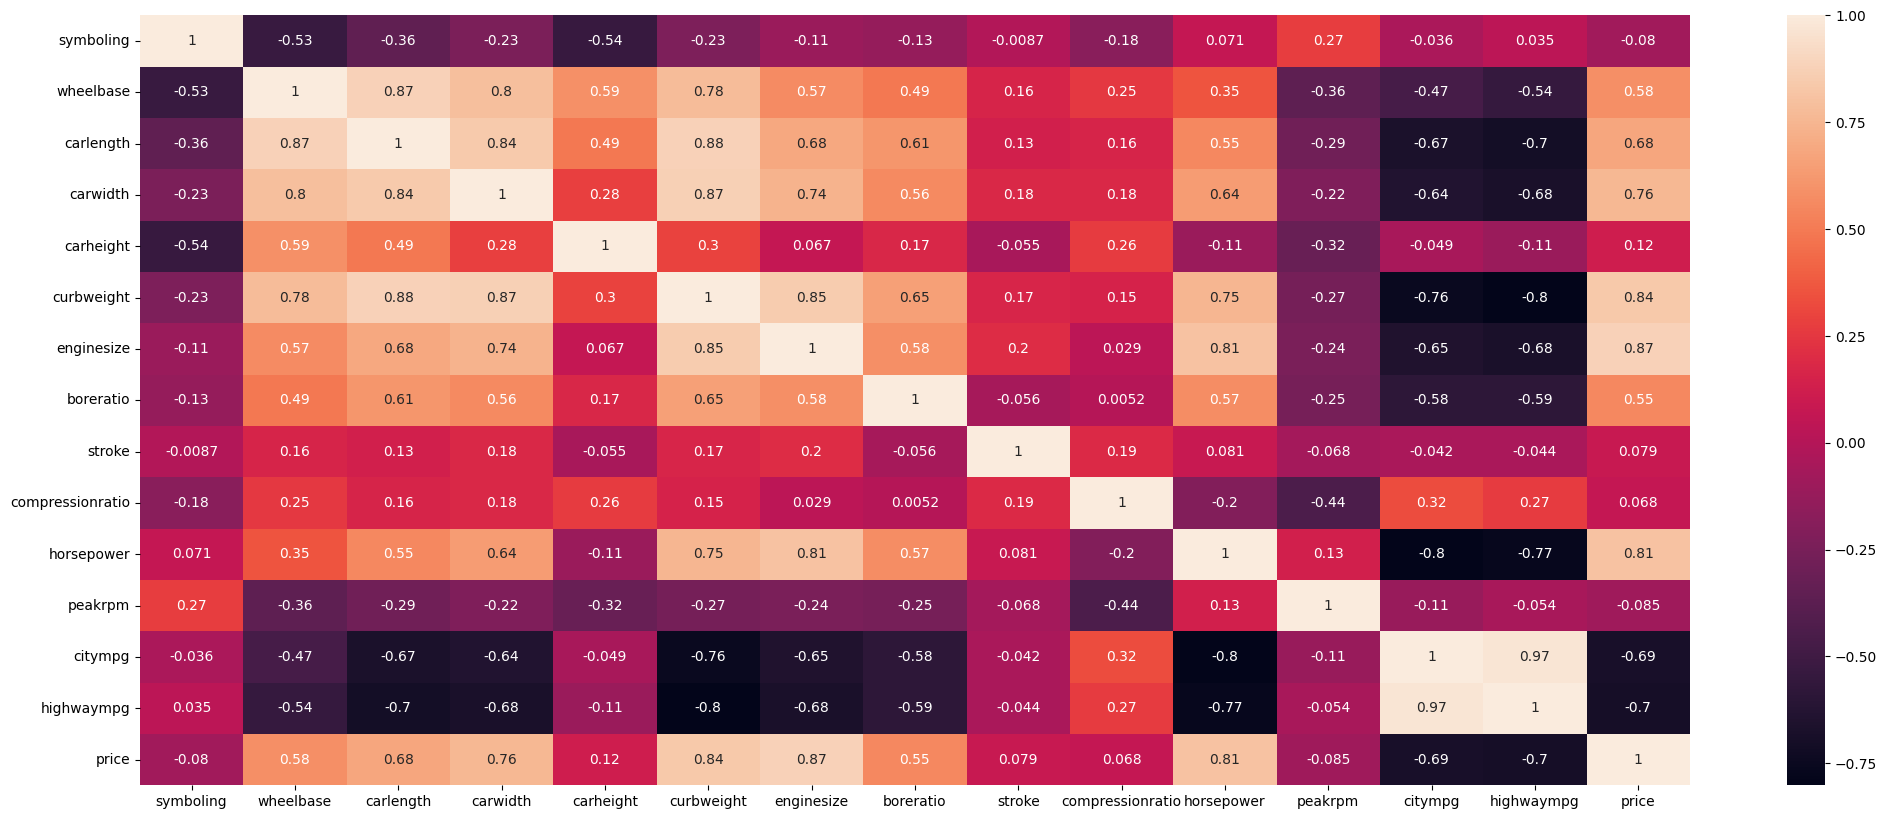

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,10))
sns.heatmap(num_df.corr(),annot=True)

In [ ]:
df['doornumber'].value_counts()

,count
doornumber,
four,115
two,90


In [ ]:
df['cylindernumber'].value_counts()

,count
cylindernumber,
four,159
six,24
five,11
eight,5
two,4
three,1
twelve,1


In [46]:
dict_words= {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}
df['doornumber']= df['doornumber'].map(dict_words)
df['cylindernumber']=df['cylindernumber'].map(dict_words)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [45]:
obj_df= df.select_dtypes(include='object')
obj_df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarCompany
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


Choosing between **one-hot encoding** and **label encoding** depends on the nature of the categorical variable you're working with and the machine learning algorithm you plan to use.

#### **1. Nature of the Categorical Variable:**
   - **Ordinal Categorical Variables:**
     - These are categories that have a natural order or ranking (e.g., "low," "medium," "high").
     - **Use Label Encoding** because the integer values assigned by label encoding can reflect the ordinal relationship between the categories.
       - Example: "low" -> 1, "medium" -> 2, "high" -> 3.
   - **Nominal Categorical Variables:**
     - These are categories that do not have an inherent order or ranking (e.g., "red," "blue," "green").
     - **Use One-Hot Encoding** because label encoding might incorrectly imply a ranking or relationship between the categories that does not exist.
       - Example: "red" -> [1, 0, 0], "blue" -> [0, 1, 0], "green" -> [0, 0, 1].

#### **2. Machine Learning Algorithm:**
   - **Tree-Based Algorithms (e.g., Decision Trees, Random Forests):**
     - These algorithms are not sensitive to the numerical nature of the input and can often handle label-encoded data effectively.
     - **Label Encoding** can be used, especially for ordinal data.
   - **Linear Algorithms (e.g., Logistic Regression, Linear Regression, SVM):**
     - These algorithms assume a linear relationship and can misinterpret label-encoded values as ordinal, which can introduce bias if the data is nominal.
     - **One-Hot Encoding** is generally preferred to prevent this issue and ensure the model does not impose a false ordinal relationship.

### **3. Number of Categories:**
   - **Few Categories (e.g., < 10):**
     - **One-Hot Encoding** is manageable even with a small number of categories, and it provides clear separations between categories.
   - **Many Categories (e.g., > 10):**
     - **Label Encoding** may be preferred if there are a large number of categories, as one-hot encoding would create a very high-dimensional feature space, which can lead to the "curse of dimensionality" and increased computational cost.
     - **One-Hot Encoding** can still be used, but it might require dimensionality reduction techniques afterward.

### **4. Risk of Introducing Bias:**
   - **One-Hot Encoding** is safer in avoiding bias since it treats all categories equally without implying any order or relationship.
   - **Label Encoding** can introduce bias if the algorithm assumes a relationship between the encoded values.

### **5. Data Sparsity:**
   - **One-Hot Encoding** results in sparse data (many zeros), which can be computationally inefficient for large datasets with many categories. Some models, however, are optimized to handle sparse data efficiently.
   - **Label Encoding** results in dense data (single column), which is more computationally efficient.



In [41]:
# One hot encoding
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [42]:
pd.get_dummies(df['carbody'],dtype=int)

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [43]:
pd.get_dummies(df[['carbody','fueltype','aspiration']],dtype=int,drop_first=True)

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,fueltype_gas,aspiration_turbo
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,1,0,0,1,0
3,0,0,1,0,1,0
4,0,0,1,0,1,0
...,...,...,...,...,...,...
200,0,0,1,0,1,0
201,0,0,1,0,1,1
202,0,0,1,0,1,0
203,0,0,1,0,0,1


In [47]:
dummy_df= pd.get_dummies(obj_df,dtype=int,drop_first=True)
dummy_df

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
201,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
202,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
203,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df.drop(columns=obj_df.columns,inplace=True)
df_new= pd.concat([df,dummy_df],axis=1)
df_new

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,0,0,1
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,0,0,1
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,0,0,0,0,1


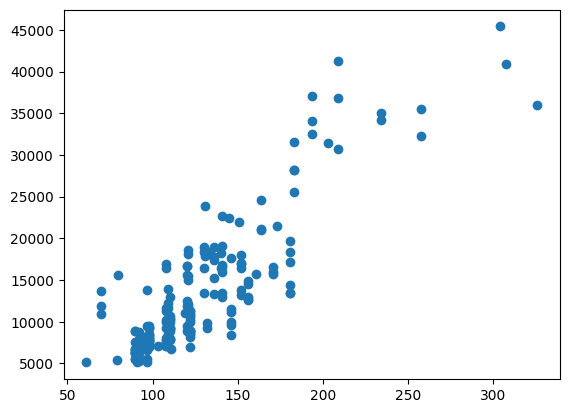

In [ ]:
plt.scatter(df['enginesize'],df['price'])

<Axes: xlabel='enginesize', ylabel='price'>

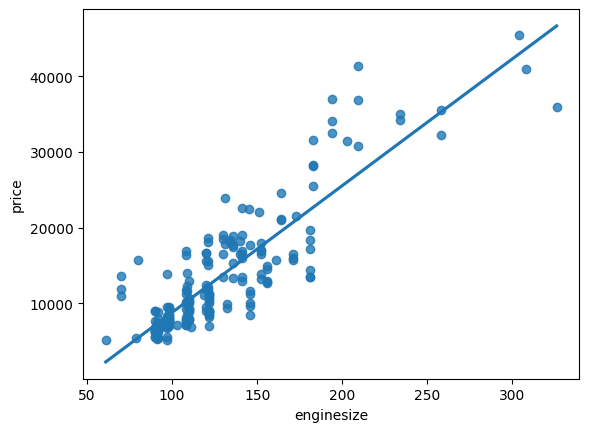

In [ ]:
sns.regplot(x=df['enginesize'],y=df['price'],ci=None)

#Simple Linear Regression

In simple linear regression, our job is to find this straight line which is called the **best fit line**. So we need to find the best fit line that can fit the most points in the scatter plot between the car price and the enginesize.

Let the equation of the best fit line be $$y = mx + c$$

Here,
- $y$ represents the price values on the $y$-axis
- $x$ represents the enginesize values on the $x$-axis
- $m$ is the slope of the line
- $c$ is the intercept made by the line on the $y$-axis

The above equation can also be written as
$$\text{price} = m \times \text{enginesize} + c$$

Hence, for the best fit line, the slope is given as

$$m = \frac{(x_1 - \bar{x})(y_1 - \bar{y}) + (x_2 - \bar{x})(y_2 - \bar{y}) + (x_3 - \bar{x})(y_3 - \bar{y}) + \dots + (x_n - \bar{x})(y_n - \bar{y})}{(x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + (x_3 - \bar{x})^2 + \dots + (x_n - \bar{x})^2}$$


$$\Rightarrow m = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$$


The intercept i.e. $c$ is given by
$$c = \bar{y} - m \bar{x}$$


**Note:** The differences between a value and the mean value is also referred to as **residuals** or **errors**.



In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(df['enginesize'],df['price'],test_size=0.33,random_state=42)

In [8]:
def errors_product():
  prod = (X_train - X_train.mean()) * (y_train - y_train.mean())
  return prod

def squared_errors():
  sq_errors = (X_train - X_train.mean()) ** 2
  return sq_errors

slope = errors_product().sum()/ squared_errors().sum()
intercept = y_train.mean() - slope * X_train.mean()

print(f"Slope: {slope} \nIntercept: {intercept}")

Slope: 165.32203370071696 
Intercept: -7590.257181325589


In [9]:
X_train_reshaped=X_train.values.reshape(-1,1)

lr=LinearRegression()
lr.fit(X_train_reshaped,y_train)
lr.intercept_, lr.coef_

(-7590.257181325582, array([165.3220337]))

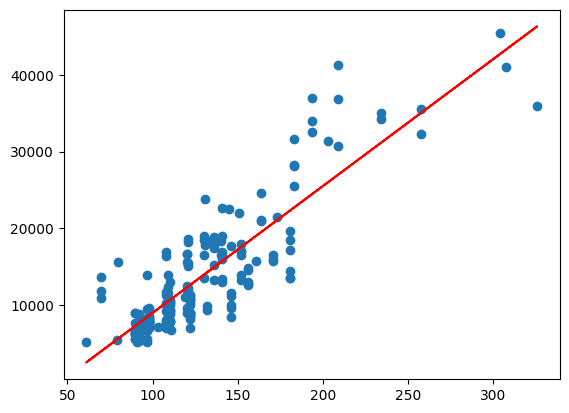

In [10]:
plt.scatter(df['enginesize'],df['price'])
plt.plot(df['enginesize'],slope*df['enginesize']+intercept,color='red')

#Model Eavaluation

###The Coefficient of Determination (R-Squared)

The R-squared ($R^2$) tells us how much of the variance in one variable explains the variance in another variable. It is usually reported in terms of percentage.

Let's compute the coefficient of determination value which is one of the parameters that explains how much variation in one variable can be explained by the other variable through the linear regression model.

$$R^2 = 1 - \frac{\text{SSE}}{\text{SST}}$$

where

$$\text{SSE} = \sum(y - y_{\text{pred}})^2$$

and

$$\text{SST} = \sum(y - \bar{y})^2$$

**SSE** stands for the sum of squared errors i.e. errors between the actual and the predicted values.

Let there be a straight line which fits them the best

The points marked with the blue colour on the straight line are the corresponding predicted values to the red-coloured points.


<center><img src = 'https://drive.google.com/uc?id=1IuVBXL1DfDpnZACRs0-L1EPbh6DJXekq' width = 700></center>

The sum of these distances is the **squared sum of errors (SSE)**. These distances would have been lower if the red-coloured points were more close to the regression line as shown in the image below.

Hence, the SSE value would have been lower. The distance between the actual values and the predicted values are given by
$$|y_i - \hat{y_i}|$$
where
- $y_i$ is the $y$-coordinate of the actual value and
- $\hat{y_i}$ is the $y$-coordinate of the corresponding predicted value

<center><img src = 'https://drive.google.com/uc?id=1FxITajwY8cBYzcSWD6h_N1fu6M43InLb' width = 700></center>

Lower the **SSE** value, higher the $R^2$ value. Higher the $R^2$ value, better is accuracy.

**SST** stands for the sum of squared **total** i.e. the errors between the actual values and their mean. Consider the image shown below.

The mean of the actual target variable values i.e. $\bar{y}$ tries to fit all the points. The arrows represent the distances between the points and their mean values.

The sum of these distances is the **squared sum of total (SST)**. They are given by
$$|y_i - \bar{y}|$$
where
- $y_i$ is the $y$-coordinate of the actual value and
- $\bar{y}$ is their mean value

<center><img src = 'https://drive.google.com/uc?id=1NkKW07i4_2neCiKILpg-mLhO2GwN3uAr' width = 700></center>

Also, it is the maximum possible error because the mean line is the worst fit line unless the points follow uniform distribution.

**Note:**

1. The terms **error, residual, difference** mean the same thing.
2. It goes without saying that the $R^2$ value will be between 0 and 1.


In [11]:
def r_square(x,y):
  y_pred = slope * x + intercept
  sse = ((y - y_pred) **2).sum()
  sst = ((y - y.mean()) **2).sum()
  r = 1 - (sse/sst)
  return r

print(r_square(X_train, y_train))
print(r_square(X_test,y_test))

0.7650159366830336
0.7606548315153334


In [12]:
import numpy as np
np.corrcoef(X_train,y_train)[0,1]**2

0.7650159366830326

In [13]:
np.corrcoef(X_train,y_train)

array([[1.        , 0.87465189],
       [0.87465189, 1.        ]])

###MSE, RMSE, MAE

Mean Squared Errors (MSE) is the mean of squares of the difference between the actual and the predicted values i.e.

$$\text{MSE} = \frac{1}{n} \sum(y_\text{actual} - y_\text{predicted})^2$$

where
- $y_\text{actual}$ is the set of actual values of the target variable

- $y_\text{predicted}$ is the set of predicted values of the target variable obtained by deploying some kind of prediction model

- $n$ is the total number of values

Root Mean Squared Errors (RMSE) is the square root of the mean squared errors (MSE) i.e.

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum(y_\text{actual} - y_\text{predicted})^2}$$

$$\Rightarrow \text{RMSE} = \sqrt{\text{MSE}}$$

Mean Absolute Errors (MAE) is the mean of absolute values of the differences between the actual and the predicted values i.e.

$$\text{MAE} = \frac{1}{n} \sum \left|y_\text{actual}- y_\text{predicted} \right|$$



In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_log_error

X_test_reshaped=X_test.values.reshape(-1,1)
y_train_pred= lr.predict(X_train_reshaped)
y_test_pred= lr.predict(X_test_reshaped)

print("Train")
print(mean_absolute_error(y_train,y_train_pred))
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_log_error(y_train,y_train_pred))
print()
print('Test')

print(mean_absolute_error(y_test,y_test_pred))
print(mean_squared_error(y_test,y_test_pred))
print(mean_squared_log_error(y_test,y_test_pred))


Train
2906.3830116569407
14675971.645771094
0.07982374537928014

Test
2773.9908161019634
15661604.54844862
0.09333552536979671


### Residual Analysis

In the residual analysis, you need to check if the error terms are normally distributed (which is infact, one of the major assumptions of linear regression). Why? Because, formally, a simple linear regression model is given as

$$Y = \beta_0 + \beta_1 x + \epsilon$$

where

- $x$ is the independent variable

- $Y$ is the response to the independent variable (or predicted value or dependent variable)

- $\beta_0$ (intercept made by the best fit line with the $y$-axis) and $\beta_1$ (slope of the best fit line) are called regression coefficients

- **$\epsilon$** is the random error obtained along with the predicted value

**For a line to be the best fit line, the mean of random errors i.e. mean of $\epsilon$ should be 0.**

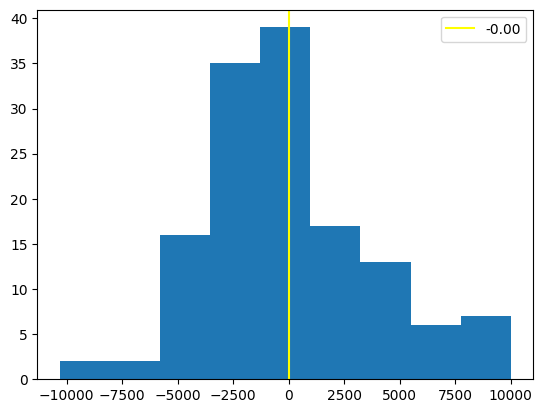

In [15]:
# Residual Analysis
train_error= y_train- y_train_pred
plt.hist(train_error, bins='sturges')
plt.axvline(train_error.mean(),label=f'{train_error.mean():.2f}',color='yellow')
plt.legend()
plt.show()

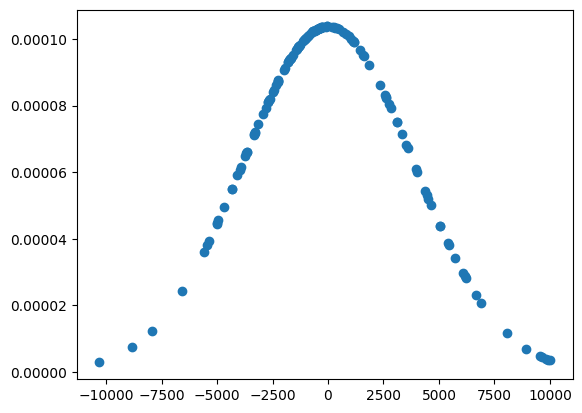

In [16]:
from scipy.stats import norm
d = norm.pdf(train_error,train_error.mean(),train_error.std())
plt.scatter(train_error,d)

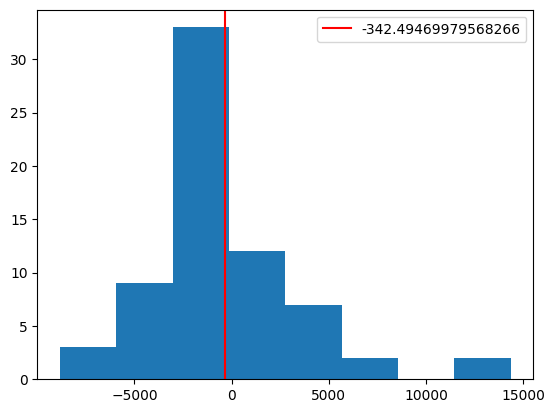

In [17]:
test_error= y_test-y_test_pred
plt.hist(test_error,bins='sturges')
plt.axvline(test_error.mean(),label= f'{test_error.mean()}',color='red')
plt.legend()
plt.show()

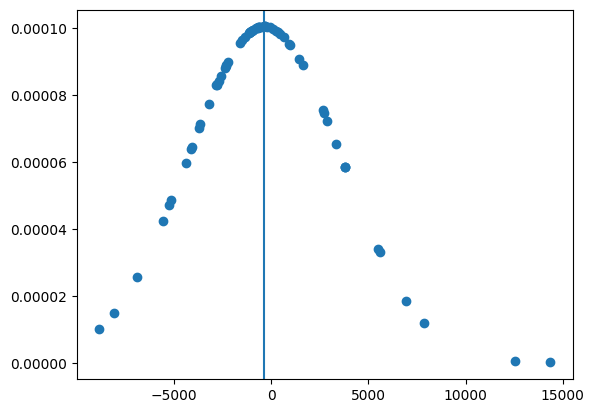

In [18]:
d2= norm.pdf(test_error,test_error.mean(),test_error.std())
plt.scatter(test_error,d2)
plt.axvline(test_error.mean())
plt.show()

###Homoscedasticity and Hetroscedasticity

Check for the trend in the scatter plot between the errors and the feature and target variables. There should not be a trend.





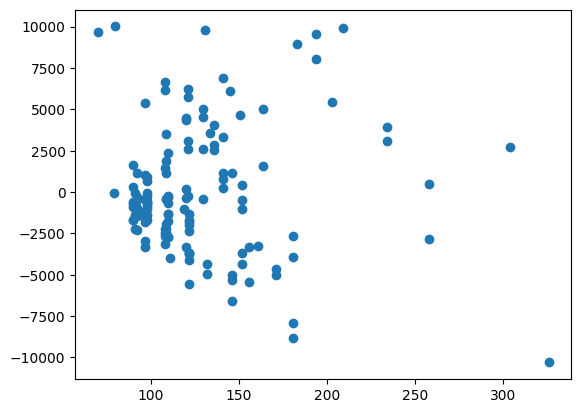

In [25]:
plt.scatter(X_train,train_error)

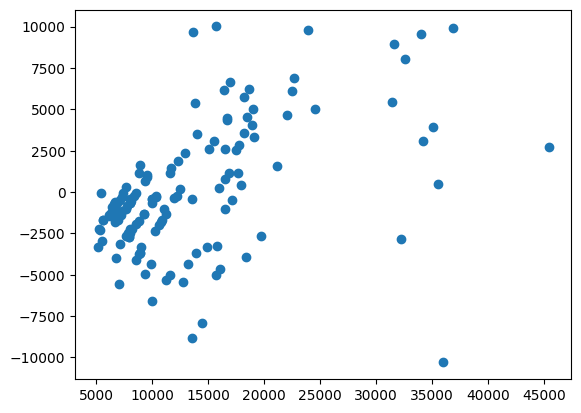

In [26]:
plt.scatter(y_train,train_error)

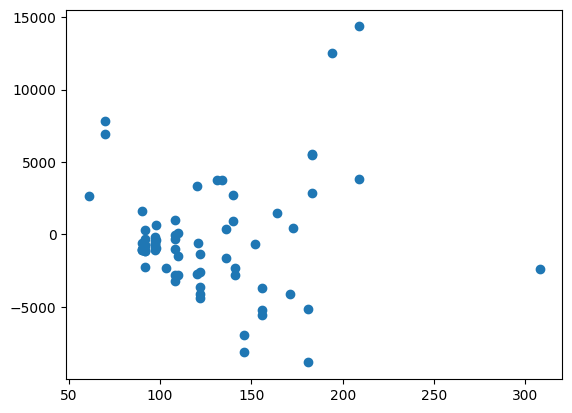

In [27]:
plt.scatter(X_test,test_error)

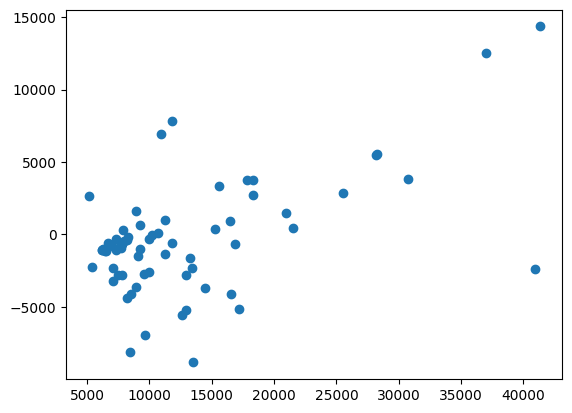

In [28]:
plt.scatter(y_test,test_error)

#Multiple Linear Regression

### Preparing data

#### Data Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
X= df_new.drop('price',axis=1)
y= df_new['price']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)
X_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
177,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,...,0,0,0,0,0,0,0,1,0,0
75,1,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,...,0,0,0,0,0,0,0,0,0,0
174,-1,102.4,175.6,66.5,54.9,2480,110,3.27,3.35,22.5,...,0,0,0,0,0,0,0,1,0,0
31,2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,...,0,0,0,0,0,0,0,0,0,0
12,0,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   doornumber             205 non-null    int64  
 2   wheelbase              205 non-null    float64
 3   carlength              205 non-null    float64
 4   carwidth               205 non-null    float64
 5   carheight              205 non-null    float64
 6   curbweight             205 non-null    int64  
 7   cylindernumber         205 non-null    int64  
 8   enginesize             205 non-null    int64  
 9   boreratio              205 non-null    float64
 10  stroke                 205 non-null    float64
 11  compressionratio       205 non-null    float64
 12  horsepower             205 non-null    int64  
 13  peakrpm                205 non-null    int64  
 14  citympg                205 non-null    int64  
 15  highwa

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 177 to 102
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              143 non-null    int64  
 1   doornumber             143 non-null    int64  
 2   wheelbase              143 non-null    float64
 3   carlength              143 non-null    float64
 4   carwidth               143 non-null    float64
 5   carheight              143 non-null    float64
 6   curbweight             143 non-null    int64  
 7   cylindernumber         143 non-null    int64  
 8   enginesize             143 non-null    int64  
 9   boreratio              143 non-null    float64
 10  stroke                 143 non-null    float64
 11  compressionratio       143 non-null    float64
 12  horsepower             143 non-null    int64  
 13  peakrpm                143 non-null    int64  
 14  citympg                143 non-null    int64  
 15  highwaymp

In [50]:
ss= StandardScaler()
ss_values= ss.fit_transform(X_train[X_train.columns[:16]])
X_train[X_train.columns[:16]]= ss_values
X_train.head()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
177,-1.5000,0.573309,0.076413,0.235105,0.043859,-0.221382,-0.121429,-0.038909,0.921956,-0.344056,...,0,0,0,0,0,0,0,1,0,0
75,0.1250,0.622875,0.302880,0.924984,0.408026,0.646950,0.314497,1.692945,-0.448994,-0.531628,...,0,0,0,0,0,0,0,0,0,0
174,-1.5000,0.573309,0.076413,0.235105,0.448489,-0.179118,-0.412047,-0.186301,0.301764,3.353784,...,0,0,0,0,0,0,0,1,0,0
31,0.9375,-2.037199,-2.430901,-0.960684,-1.210497,-1.448956,-0.847973,-1.512828,0.497614,-0.210076,...,0,0,0,0,0,0,0,0,0,0
12,-0.6875,0.375042,0.173470,-0.546757,0.205711,0.262732,0.895732,-0.038909,-0.220503,-0.263668,...,0,0,0,0,0,0,0,0,0,0


In [51]:
import statsmodels.api as sm
X_train_sm= sm.add_constant(X_train)
model= sm.OLS(y_train,X_train_sm).fit()
model.params

,0
const,19245.281479
symboling,-374.616940
wheelbase,395.476562
carlength,-697.736065
carwidth,1524.083576
...,...
CarCompany_saab,-709.312005
CarCompany_subaru,-4334.876771
CarCompany_toyota,-3829.117638
CarCompany_volkswagen,-2853.968000


In [52]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     65.06
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           2.40e-51
Time:                        13:24:06   Log-Likelihood:                -1211.0
No. Observations:                 143   AIC:                             2540.
Df Residuals:                      84   BIC:                             2715.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.925e+

#### Adjusted $R^2$

In the case of multiple linear regression, **adjusted $R^2$** value takes precedence over the $R^2$ value. It is calculated as:

$$R^2_{\text{adj}} = 1 - \frac{(1 - R^2)(N - 1)}{N - p - 1}$$

where

- $R^2$ is the coefficient of determination

- $N$ is number of instances (or rows) in the dataset

- $p$ is the number of independent variables (excluding constant) in the dataset

the $R^2_{\text{adj}}$ will always be less than or equatl to the $R^2$ value i.e. $R^2_{\text{adj}} \le R^2$.

**Why adjusted R-squared is a better metric in multiple linear regression?**

As you add more and more independent variables, the $R^2$ squared values increases even if the independent variable has no contribution in predicting the values of the target variable. Hence, the adjusted $R^2$ value penalises the unnecessary inclusion of more independent variables.

So, if adding more independent (or feature) variables leads to an increase in the adjusted $R^2$ value, then it is a good sign. However, if adding more independent (or feature) variables leads to a decrease in the adjusted $R^2$ value, it is a bad sign.

In this case, the $R^2_{\text{adj}}$ is quite high but the p-values for many of the columns is greater than 0.05 which is not a good sign. It means, these variables are insignificant in predicting the price of a car. Also, if we calculate variance inflation factor values for these columns, they would be very very high than 10.

####Ordinary Least Squares (OLS)

Consider the regression equation

$$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \dots + \beta_k x_k + \epsilon$$

where

- $x_1, x_2, x_3, \dots , x_k$ are independent variables or features

- $Y$ is the response to the independent variable (or predicted value or dependent variable)

- $\beta_0, \beta_1, \beta_2, \dots, \beta_k$ are the corresponding regression coefficients of the independent variables

- **$\epsilon$** is the random error obtained along with the predicted value which follows normal distribution with mean $0$ and some standard deviation of $\sigma$


The parameters $\beta_0, \beta_1, \beta_2, \dots, \beta_n$ and $\sigma$ are assumed to be unknown and must be estimated from the data, which we shall suppose will consist of the values of $Y_1, Y_2, Y_3, \dots , Y_n$ where $Y_i$ is the response level corresponding to the $k$ features $x_{i1}, \dots , x_{i2}, \dots , x_{ik}$ . That is, the $Y_i$ are related to these features through

$$E[Y_i] = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \dots + \beta_k x_{ik}$$

where

- $E[Y_i]$ means **expected value** for an instance $i$. In simple terms, instance or $i$ denotes a row in a data frame

- $x_{i1}$ denotes item at the $i^{\text{th}}$ row in the $1^{\text{st}}$ column in a data frame having only features

- $x_{i2}$ denotes item at the $i^{\text{th}}$ row in the $2^{\text{nd}}$ column in a data frame having only features

- $x_{i3}$ denotes item at the $i^{\text{th}}$ row in the $3^{\text{rd}}$ column in a data frame having only features

  $\dots$

- $x_{ik}$ denotes item at the $i^{\text{th}}$ row in the $k^{\text{th}}$ column in a data frame having only features



As we said earlier, the difference between the actual and the predicted values should be 0 or close to 0 for an accurate prediction model i.e.

$$Y_1 - E[Y_1] \approx 0$$

$$Y_2 - E[Y_2] \approx 0$$

$$Y_3 - E[Y_3] \approx 0$$

$$\vdots$$

$$Y_N - E[Y_N] \approx 0$$

where $N$ is the total number of instances (or rows in a data frame).

**The OLS says that the sum of squares of all these errors i.e.**

$$J = (Y_1 - E[Y_1])^2 + (Y_2 - E[Y_2])^2 + (Y_3 - E[Y_3])^2 + \dots + (Y_N - E[Y_N])^2$$

**should be the least or minimum.**

The above expression can be compressed as
$$J = \sum_{i = 1}^{N}(Y_i - E[Y_i])^2$$

So in general, it can be written as

$$J(\beta, x) = \sum_{i = 1}^{N}(Y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \beta_3 x_{i3} - \dots - \beta_k x_{ik})^2 $$

where $J(\beta, x)$ denotes the sum of the squared errors is dependent on the coefficients ($\beta_0, \beta_1, \beta_2, \dots, \beta_k$) and features ($x_1, x_2, x_3, \dots , x_k$)



To find the points of maxima (peak) or minima (valley), we differentiate a mathematical function w.r.t. independent variable and equate the result obtained to 0 because the slope of a curve at the point of maxima (peak) or minima (valley) is 0. Differentiation (or derivative) represents slope at a point.

In the above equation, all the $x$ quantities are known quantities as we have seen earlier. So the $\beta_0, \beta_1, \beta_2, \dots, \beta_k$ are unknown quantities. Thus, they are independent variables.

Here $\beta_0, \beta_1, \beta_2, \dots, \beta_k$ are independent of each other. Hence, we can do partial differentiation w.r.t. to each of the betas independently.

Let's differentiate $J(\beta, x)$ w.r.t. $\beta_0$. So every other term apart from $\beta_0$ will be treated as a constant. And the differentiation (or derivative) of a constant is 0.

$$\frac{\partial J}{\partial \beta_0} = 2 \sum_{i = 1}^{N}(Y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \beta_3 x_{i3} - \dots - \beta_k x_{ik})(-1) = 0$$

$$\Rightarrow \sum_{i = 1}^{N}(Y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \beta_3 x_{i3} - \dots - \beta_k x_{ik}) = 0$$

Similarly,

$$\frac{\partial J}{\partial \beta_1} = 2 \sum_{i = 1}^{N}(Y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \beta_3 x_{i3} - \dots - \beta_k x_{ik})(-x_{i1}) = 0$$

$$\Rightarrow \sum_{i = 1}^{N}(Y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \beta_3 x_{i3} - \dots - \beta_k x_{ik})x_{i1} = 0$$

$$\frac{\partial J}{\partial \beta_2} = 2 \sum_{i = 1}^{N}(Y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \beta_3 x_{i3} - \dots - \beta_k x_{ik})(-x_{i2}) = 0$$

$$\Rightarrow \sum_{i = 1}^{N}(Y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \beta_3 x_{i3} - \dots - \beta_k x_{ik})x_{i2} = 0$$

$$\vdots$$

$$\frac{\partial J}{\partial \beta_k} = 2 \sum_{i = 1}^{N}(Y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \beta_3 x_{i3} - \dots - \beta_k x_{ik})(-x_{ik}) = 0$$

$$\Rightarrow \sum_{i = 1}^{N}(Y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \beta_3 x_{i3} - \dots - \beta_k x_{ik})x_{ik} = 0$$


On further reducing the above $k + 1$ equations, we get

$$\sum_{i = 1}^{N}Y_i = N \beta_0 + \beta_1 \sum_{i = 1}^{N}x_{i1} + \beta_2 \sum_{i = 1}^{N}x_{i2} + \dots + \beta_k \sum_{i = 1}^{N} x_{ik}$$

$$\sum_{i = 1}^{N}Y_i x_{i1} = \beta_0 \sum_{i = 1}^{N}x_{i1} + \beta_1 \sum_{i = 1}^{N}x_{i1}^2 + \beta_2 \sum_{i = 1}^{N} x_{i1} x_{i2} + \dots + \beta_k \sum_{i = 1}^{N} x_{i1} x_{ik}$$

$$\vdots$$

$$\sum_{i = 1}^{N}Y_i x_{ik} = \beta_0 \sum_{i = 1}^{N}x_{ik} + \beta_1 \sum_{i = 1}^{N} x_{ik} x_{i1} + \beta_2 \sum_{i = 1}^{N} x_{ik} x_{i2} + \dots + \beta_k \sum_{i = 1}^{N} x_{ik}^2$$


Now we have $k + 1$ linear equations having $k + 1$ unknowns i.e. $\beta_0, \beta_1, \beta_2, \dots, \beta_k$ . By solving these $k + 1$ equations, we can get the beta values. This is exactly the same as solving two linear equations having two unknowns. For e.g., the solution to the two linear equations

$$8\beta_0 + 7\beta_1 = 38 \space{} \text{and} \space{} 3 \beta_0 - 5 \beta_1 = -1$$

is
$$\beta_0 = 3 \space{} \text{and} \space{} \beta_1 = 2$$

So all-in-all, **ordinary least  squares** says that **find the values of the coefficients ($\beta_0, \beta_1, \beta_2, \dots, \beta_k$) such that the sum of the squares of differences between the actual values and the predicted values is minimum.**

To solve $k + 1$ linear equations having $k + 1$ unknowns, you need to know matrices.

The above $k + 1$ linear equations can also be written as


$$\begin{bmatrix}\sum_{i = 1}^{N}Y_i \\ \sum_{i = 1}^{N}Y_i x_{i1} \\ \sum_{i = 1}^{N}Y_i x_{i2} \\ \vdots \\ \sum_{i = 1}^{N}Y_i x_{ik} \\\end{bmatrix} = \begin{bmatrix} \sum_{i = 1}^{N}1 & \sum_{i = 1}^{N}x_{i1} & \sum_{i = 1}^{N}x_{i2} & \dots & \sum_{i = 1}^{N}x_{ik} \\ \sum_{i = 1}^{N}x_{i1} & \sum_{i = 1}^{N}x_{i1}^2 & \sum_{i = 1}^{N}x_{i1}x_{i2} & \dots & \sum_{i = 1}^{N}x_{i1}x_{1k} \\ \sum_{i = 1}^{N}x_{i2} & \sum_{i = 1}^{N}x_{i1} x_{i2} & \sum_{i = 1}^{N}x_{i2}^2 & \dots & \sum_{i = 1}^{N}x_{i2} x_{ik} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\\sum_{i = 1}^{N}x_{ik} & \sum_{i = 1}^{N}x_{ik} x_{i1} & \sum_{i = 1}^{N}x_{ik} x_{i2} & \dots & \sum_{i = 1}^{N}x_{ik}^2 \\\end{bmatrix}\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\  \vdots \\ \beta_k \\\end{bmatrix}$$

in the matrix form. The above matrix equation can also be written as

$$X^T Y = X^T X B$$

or

$$X^T X B = X^T Y$$


where

$$X = \begin{bmatrix}1 & x_{11} & x_{12} & x_{13} & \dots & x_{1k} \\ 1 & x_{21} & x_{22} & x_{23} & \dots & x_{2k} \\ 1 & x_{31} & x_{32} & x_{33} & \dots & x_{3k} \\ \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\1 & x_{N1} & x_{N2} & x_{N3} & \dots & x_{Nk} \\\end{bmatrix}$$

$$X^T = \begin{bmatrix}1 & 1 & 1 & \dots & 1 \\ x_{11} & x_{21} & x_{31} & \dots & x_{N1} \\ x_{12} & x_{22} & x_{32} & \dots & x_{N2} \\ x_{13}  & x_{23} & x_{33} & \dots & x_{N3} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\x_{1k} & x_{2k} & x_{3k} & \dots & x_{Nk} \\\end{bmatrix}$$

$$Y = \begin{bmatrix}Y_1 \\ Y_2 \\ Y_3 \\ \vdots \\ Y_N \\\end{bmatrix} \space{} \text{and} \space{} B = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\  \vdots \\ \beta_k \\\end{bmatrix}$$

In the matrix equation,

$$X^T X B = X^T Y$$

to obtain only the matrix $B$ on the left-hand side, you need to multiply both the sides by $(X^T X)^{-1}$, i.e.


$$(X^T X)^{-1} X^T X B = (X^T X)^{-1} X^T Y$$

To simply the above equation, let

$$Z = X^T X$$

$$\therefore Z^{-1} = (X^T X)^{-1}$$

Hence, the above equation becomes

$$Z^{-1} Z B = Z^{-1} X^T Y$$

$$\Rightarrow IB = Z^{-1} X^T Y \space{} \space{} [\because Z^{-1}Z = I]$$

$$\Rightarrow B = Z^{-1} X^T Y \space{} \space{} [\because IB = B]$$

Let $U = X^T Y$

$$\therefore B = Z^{-1} U$$

Now, you need to obtain the $Z^{-1}$ and multiply it with the matrix $U$ to estimate the values of betas using the matrix operations only. But before that, you need to add a new column to the matrix $X$, i.e., `X_train`. All the items of this new column should be $1$.



#### Variance Inflation factor (VIF)

Measure of Multicollinearity

Variance Infation Factor (VIF) is a way to detect multicollinearity between independent variables in a dataset. We calculate the VIF values to measure the extent of multicollinearity between the independent variables.  

For $k$ different independent variables, we can calculate $k$ different VIFs (one for each $x_i$ where $i = 1, 2, 3, \dots, k$) in three steps:

**Step one**

First, build a multiple linear regression model wherein $x_i$ is a target variable and it is a function of all the other feature variables as illustrated in the equation below.

$$x_1 = \beta_0^* + \beta_2^* x_2 + \beta_3^* x_3 + \beta_4^* x_4 + \dots + \beta_k^* x_k + \epsilon^*$$

Here,

- $x_1$ is a feature acting as the target (or dependent) variable in above equation

- $x_2, x_3, x_4, \dots , x_k$ are independent variables or features

- $\beta_0^*, \beta_2^*, \beta_3^*, \dots, \beta_k^*$ are the corresponding regression coefficients of the independent variables in the above linear regression equation

- **$\epsilon^*$** is the random error obtained along with the predicted value

**Step two**

Then, calculate the VIF for $x_{i}$ using the following formula:

$$\text{VIF}_{i} = \frac{1}{1-R_{i}^{2}}$$

where $R^2 _i$ is the coefficient of determination of the regression equation in step one, with $x_{1}$ on the left hand side, and all other independent variables on the right hand side.

**Step three**

Analyse the extent of multicollinearity by considering the magnitude of the $\text{VIF}_{i}$. **A rule of thumb is that if $\text{VIF}_{i} > 10$, then multicollinearity is high. In that case, the $x_i$ feature must be dropped to predict the values of the target (or dependent) variable.** A cutoff of 5 is also commonly used.

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new= X_train[['enginesize','curbweight','horsepower','citympg']]
X_train_new_sm= sm.add_constant(X_train_new)
model_new= sm.OLS(y_train,X_train_new_sm)
vif_df= pd.DataFrame()
vif_df['Features']= X_train_new_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_new_sm.values, i) for i in range(X_train_new_sm.shape[1])]
vif_df

,Features,VIF
0,const,1.000000
1,enginesize,4.901158
2,curbweight,4.732600
3,horsepower,4.533126
4,citympg,3.942814


####Calculating VIF for 'enginesize'

In [54]:
X_train_eng= X_train_new.drop('enginesize',axis=1)
y_train_eng= X_train_new['enginesize']
X_train_eng_sm=sm.add_constant(X_train_eng)
model_eng=sm.OLS(y_train_eng,X_train_eng_sm).fit()
print(model_eng.summary())

                            OLS Regression Results                            
Dep. Variable:             enginesize   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     180.8
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           8.94e-48
Time:                        13:24:25   Log-Likelihood:                -89.261
No. Observations:                 143   AIC:                             186.5
Df Residuals:                     139   BIC:                             198.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.949e-17      0.038    7.7e-16      1.0

In [55]:
print(f"VIF value for enginesize is {1/(1-0.8)}")

VIF value for enginesize is 5.000000000000001


In [56]:
# VIF for all the features
vif_df= pd.DataFrame()
vif_df['Features']= X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif_df

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Features,VIF
0,const,0.000000
1,symboling,7.518055
2,wheelbase,34.440918
3,carlength,35.104050
4,carwidth,18.329828
...,...,...
60,CarCompany_saab,9.862719
61,CarCompany_subaru,inf
62,CarCompany_toyota,18.329253
63,CarCompany_volkswagen,12.564249


*Note: 'inf' and 'NaN values may occur due to multicollinearity.*

##Understanding Hypothesis Testing

From the summary report of the linear regression, you may observe that each feature variable has a **p-value** `(P>|t|)` associated with it. The p-value is one of the important statistics which can be used to eliminate features which are not relatively significant in our model.

**Hypothesis Testing**

Hypothesis Testing is basically testing an assumption that we make about a parameter. This assumption may or may not be true.

The steps followed in hypothesis testing are:

1. An initial assumption or hypothesis is made.
2. The validity of that hypothesis is tested.
3. If the hypothesis is found to be true, it is accepted otherwise it is rejected.

There are two types of hypothesis:

1. **Null hypothesis:** denoted by $H_0$, is a general statement or an initial assumption which we make about a parameter.
2. **Alternative hypothesis:** denoted by $H_1$ or $H_a$, It is contrary to the null hypothesis. It is the hypothesis we would accept if our null hypothesis is found to be false.

In hypothesis testing, we need to gather enough evidence to either accept or reject our null hypothesis. There are two types of hypothesis tests that can be used for multiple linear regression:
- **F-test:** This test measures the overall significance of all the coefficients.
- **T-test:** This test measures the significance of each individual coefficient.

### F-test
The F-test is used to assess all the coefficients collectively. It validates whether any of the independent variables are significant.


The regression equation for the car price prediction model can be given as

$$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \dots + \beta_{59} x_{59} + \epsilon$$

where,

 - $x_1$ is `symboling`
 - $x_2$ is `doornumber`
 - $x_3$ is `wheelbase`

 $\vdots$   

 - $x_{59}$ is `wheelbase` and
 - $Y$ is the `price`


**Step 1: Define null and alternative hypothesis**

$H_0: \beta_1 = \beta_2 = \dots = \beta_{59} = 0$ i.e. all the regression coefficients are equal to zero.

$H_1: \beta_i \neq 0$, i.e. at least one of the coefficient is not zero.

- $H_0$ means that none of the feature or independent variables have a significant relationship with our target variable `price` and our model has no predictive capability.

- $H_1$ means that at least one feature variable has a significant relationship with our target variable `price`.

**Step 2: Calculate the test statistic value** (in case of F-test it is F-statistic value)

It is calculated as

$$F* = \frac{\textrm{explained variance}}{\textrm{unexplained variance}} = \frac{\text{MSM}}{\text{MSE}}$$

where,

- MSM is the Mean of Squares for Model
- MSE is Mean of Squared Errors (or Residuals)

Further, MSM  is calculated as

$$\text{MSM} = \frac{\text{SSM}}{\text{DFM}}=\frac{\sum(y_{\text{pred}} - \bar{y})^2}{ p - 1}$$

where,
- SSM is the Sum of Squares for Model
- DFM is Degrees of Freedom for Model
- $p$ is the number of independent variables

Similarly, MSE is calculated as:

$$\text{MSE} = \frac{\text{SSE}}{\text{DFE}}=\frac{\sum(y - y_{\text{pred}})^2}{ N - p}$$

where,
- SSE is the Sum of Squares for Errors
- DFE is Degrees of Freedom for Errors
- $N$ is number of instances (or rows) in the dataset

Let's create `mean_sq_model()` and `mean_sq_error()` functions to calculate the MSM and MSE values using the above formulae respectively.

**Note:** You can also obtain the MSM and MSE values using the `mse_model` and `mse_resid` attributes respectively of `statsmodels.api` module.

In [57]:
#calculating f-stat
f_stat=model.mse_model/model.mse_resid
print(f"The F-statistics for the model {model.mse_model/model.mse_resid}")

The F-statistics for the model 65.062534538753


In [58]:
#Calculating p-value
from scipy.stats import norm
p_val = 2*(1-norm.cdf(abs(f_stat)))
print(p_val)


0.0


In [59]:
model.f_pvalue

2.3959984201391748e-51

*Note:If p-value is below 0.05, the null hypothesis will be rejected.*

The p-value that we obtained from F-test is equal to 0.00, so we can reject our null hypothesis and conclude that at least one of the independent variable has linear relationship with our target variable `price`. But, what is p-value?

**What is meant by p-value?**

The p-value is a probability value that helps us to determine whether our hypothesis is correct. The p-value for each feature tests the null hypothesis that there is no correlation between the feature and the target variable. Smaller the p-value, stronger is the evidence that you should reject null hypothesis. A p-value less than 0.05 is statistically significant. It indicates that there is less than 5% probability that the null hypothesis is correct. Therefore, we reject the null hypothesis, and accept the alternative hypothesis. However, a p-value greater than 0.05 indicates weak evidence and we fail to reject the null hypothesis.

The F-test for our model rejected the null hypothesis and concluded that at least one feature variable is significant and our model definitely possess predictive capability. Now, we will perform **t-test** to determine which variables are significant in predicting the price of a car and which are not.

####T-test

After concluding from the F-test that at least one feature variable is significant, now we may want to know which variables are significant. For this, we can do a **t-test** to find out which independent variable is making a useful contribution in the prediction of the dependent variable.


$$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \dots + \beta_{59} x_{59} + \epsilon$$

where,
 - $x_1$ is `symboling`
 - $x_2$ is `doornumber`
 - $x_3$ is `wheelbase`

 $\vdots$   

 - $x_{59}$ is `wheelbase` and
 - $Y$ is the `price`

For example, let us determine whether feature `symboling` is contributing significantly in the prediction of dependent variable `price`. We will follow the same steps as that of F-test.

**Step 1:  Define the null and alternative hypothesis**

$H_0:   \beta_1 = 0$ i.e. `symboling` and `price` are not linearly related

$H_1:   \beta_1 \neq 0$ i.e. `symboling` and `price` are linearly related

**Step 2: Calculate the test statistic value** (in case of t-test, it is t-statistic value)

The t-statistic is calculated as:

$$t∗= \frac{\textrm{coefficient - hypothesized  value} }{\textrm{standard  error  of  coefficient}}$$

As the hypothesized value is usually 0,
$$t∗= \frac{\textrm{coefficient} }{\textrm{standard  error  of  coefficient}}$$

For our example above, the t-statistic is:

$$t∗= \frac{\beta_1 }{SE(\beta_1)}$$

The **standard error of coefficient (SE)** is an estimate of the standard deviation of the coefficient, the amount it varies across cases. Its formula is quite complicated.

However, we can obtain standard error for every coefficient by using `bse` attribute of `statsmodels.api` module. The `b` in `bse` stands for the coefficient $\beta$ and `se` for standard errors.


In [60]:
bse_symboling= model.bse['symboling']
t1= model.params['symboling']/bse_symboling
print(t1)

-1.0869492831512833


In [61]:
# p-value for t-stat
print(f"p-value for t-stat for symboling {2* (1-norm.cdf(abs(t1)))}")


p-value for t-stat for symboling 0.2770592242348642


Hence symboling and price are not linearly related hence symboling is insignificant.

In [62]:
# Check all the p_values
print(model.pvalues)

const                    0.000036
symboling                0.280168
wheelbase                0.593296
carlength                0.351503
carwidth                 0.005787
                           ...   
CarCompany_saab          0.742171
CarCompany_subaru        0.006747
CarCompany_toyota        0.013679
CarCompany_volkswagen    0.106086
CarCompany_volvo         0.390871
Length: 65, dtype: float64


In [63]:
new_df = pd.DataFrame()
new_df['feature']=X_train.columns
new_df['pValues'] = model.pvalues.values[1:]
new_df=new_df[new_df['pValues']<=0.05]
new_df

,feature,pValues
3,carwidth,0.005787
5,curbweight,0.019426
6,enginesize,0.004136
11,peakrpm,0.007374
15,aspiration_turbo,0.004530
18,carbody_hatchback,0.013073
19,carbody_sedan,0.020555
20,carbody_wagon,0.009889
23,enginelocation_rear,0.006040
38,fuelsystem_idi,0.035559


In [64]:
#rebuild the Linear regression model
X_new= X[new_df.feature]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size = 0.33, random_state = 42)

X_train_sm2 = sm.add_constant(X_train2)
model2 = sm.OLS(y_train2, X_train_sm2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     84.68
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.50e-59
Time:                        13:25:10   Log-Likelihood:                -1235.8
No. Observations:                 137   AIC:                             2514.
Df Residuals:                     116   BIC:                             2575.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.737e+

Still we have p_values higher than 0.05 in the result. A better approach to this is using RFE.

In [65]:
# Find the moderately too highly correlated features with price.
corr_df= df_new.corr()['price']
corr_data=corr_df[(corr_df >=0.5)| (corr_df<=-0.5)]
corr_features= list(corr_data.index)
corr_features.remove('price')
corr_features


['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'cylindernumber_four',
 'fuelsystem_2bbl',
 'fuelsystem_mpfi',
 'CarCompany_buick']

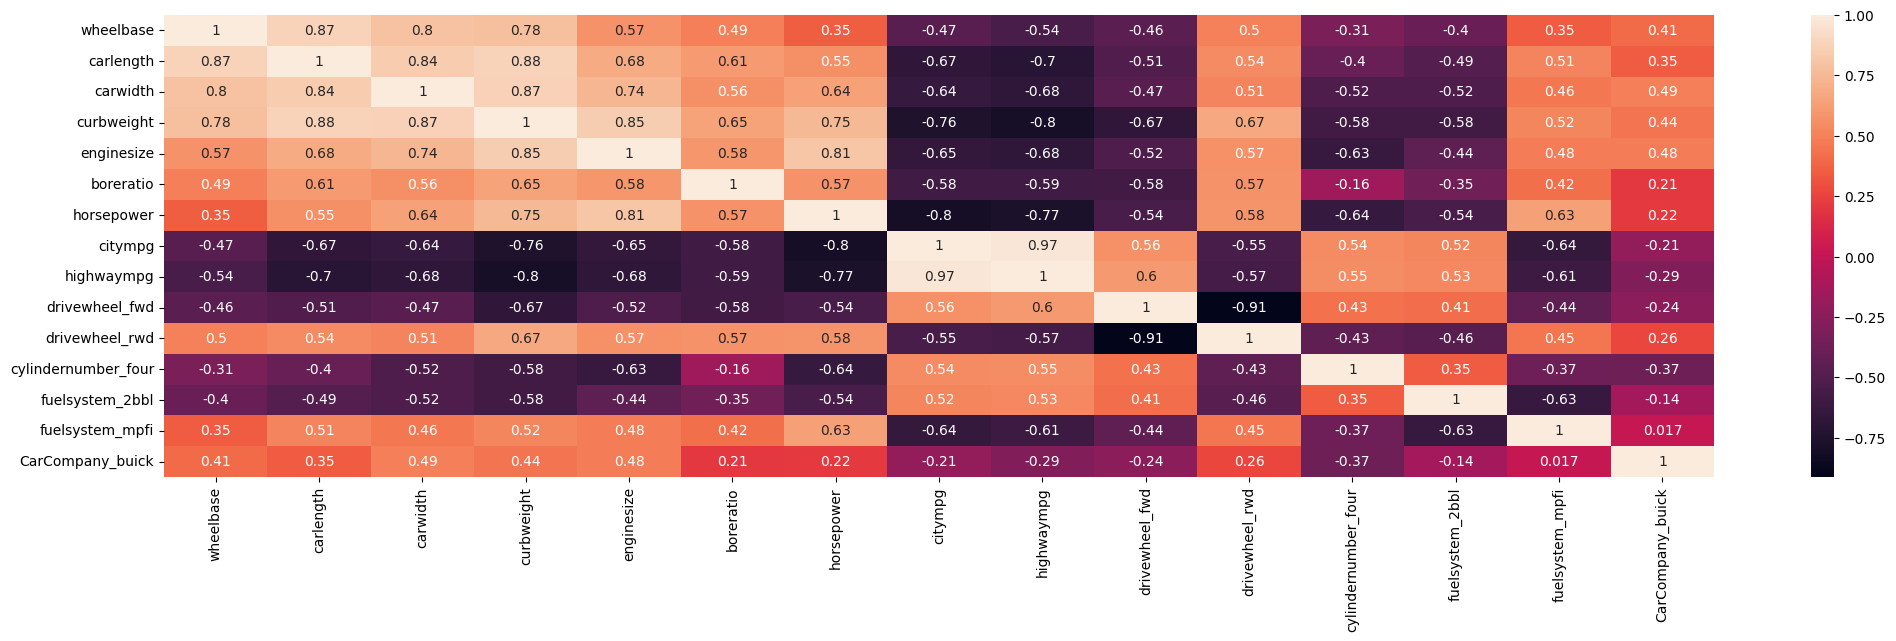

In [66]:
df2= df_new[corr_features]
plt.figure(figsize=(25,6),dpi=100)
sns.heatmap(df2.corr(),annot=True)
plt.show()

##Recursive Feature Elimination (RFE)

Recursive feature elimination (RFE) is a feature selection (or elimination) method that fits a model and removes the weakest feature (or features). Here, you need to decide the numbers of features you want to select to build a model. Then you can validate your choice of number of features and increase or decrease them (if required). Features are ranked by the model's `coef_` or `feature_importances_` attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in a machine learning model.

RFE requires a specified number of features to keep, however it is often not known in advance how many features are valid.


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lr=LinearRegression()
rfe1= RFE(lr,n_features_to_select=10)
rfe1.fit(X_train[corr_features],y_train)
print(corr_features)
print(rfe1.support_)
print(rfe1.ranking_)

['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'cylindernumber_four', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'CarCompany_buick']
[False False  True False  True False  True  True  True  True  True  True
  True False  True]
[4 3 1 6 1 5 1 1 1 1 1 1 1 2 1]


In [68]:
# Look at the features selected.
rfe1_features= X_train[corr_features].columns[rfe1.support_]
rfe1_features

Index(['carwidth', 'enginesize', 'horsepower', 'citympg', 'highwaympg',
       'drivewheel_fwd', 'drivewheel_rwd', 'cylindernumber_four',
       'fuelsystem_2bbl', 'CarCompany_buick'],
      dtype='object')

In [69]:
# Check for multicollinearity.
X_train_rfe1= X_train[rfe1_features]
X_train_rfe1_sm = sm.add_constant(X_train_rfe1)
lr = sm.OLS(y_train, X_train_rfe1_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     96.40
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.18e-55
Time:                        13:25:31   Log-Likelihood:                -1333.2
No. Observations:                 143   AIC:                             2688.
Df Residuals:                     132   BIC:                             2721.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.596e+04   1

In [70]:
vif=pd.DataFrame()
vif['Feature']= X_train_rfe1_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe1_sm.values,i) for i in range(X_train_rfe1_sm.shape[1])]
vif

,Feature,VIF
0,const,41.522713
1,carwidth,2.470770
2,enginesize,4.650819
3,horsepower,5.509960
4,citympg,18.529437
5,highwaympg,18.623820
6,drivewheel_fwd,8.650147
7,drivewheel_rwd,8.652040
8,cylindernumber_four,2.064984
9,fuelsystem_2bbl,1.689844


So 5 features have a higher p-value out of 10 selected features, so we need to remove 5 features. Rebuild the RFE model to select 5 features this time.

In [71]:
lr2=LinearRegression()
rfe2= RFE(lr2,n_features_to_select=5)
rfe2.fit(X_train[corr_features],y_train)
print(corr_features)
print(rfe2.support_)
print(rfe2.ranking_)

['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'cylindernumber_four', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'CarCompany_buick']
[False False False False  True False  True False False  True False  True
 False False  True]
[ 9  8  2 11  1 10  1  4  5  1  6  1  3  7  1]


In [72]:
rfe2_features= X_train[corr_features].columns[rfe2.support_]
rfe2_features

Index(['enginesize', 'horsepower', 'drivewheel_fwd', 'cylindernumber_four',
       'CarCompany_buick'],
      dtype='object')

In [73]:
#check multicollinearity
X_train_rfe2= X_train[rfe2_features]
X_train_rfe2_sm= sm.add_constant(X_train_rfe2)
model3= sm.OLS(y_train,X_train_rfe2_sm).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     162.8
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           8.11e-56
Time:                        13:25:42   Log-Likelihood:                -1346.1
No. Observations:                 143   AIC:                             2704.
Df Residuals:                     137   BIC:                             2722.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.654e+04    

In [74]:
vif=pd.DataFrame()
vif['Feature']= X_train_rfe2_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2_sm.values,i) for i in range(X_train_rfe2_sm.shape[1])]
vif

,Feature,VIF
0,const,11.058066
1,enginesize,4.023162
2,horsepower,3.497478
3,drivewheel_fwd,1.489937
4,cylindernumber_four,2.032610
5,CarCompany_buick,1.417619


In [75]:
X_train_final = X_train_rfe2_sm.drop(columns = "const")

model_final = LinearRegression()
model_final.fit(X_train_final,y_train)
y_train_pred = model_final.predict(X_train_final)

When you are predicting large numbers (such as prices, length in millimeter scale etc), often the errors (difference between the actual and the predicted values) are also quite large. In such cases, the MSE, MSE and RMSE values are also large that might give us a false sense that the prediction model is poor. Hence, in such cases, it is best to use another parameter to analyse the errors. This parameter is called **Mean-Squared Log Error (MSLE)**.

Mathematically, it is written as

$$\text{MSLE} = \frac{1}{n}\left( \log{(y_\text{actual} + 1)} - \log{(y_\text{predicted} + 1)} \right)^2$$



**Note: The 1 added to both actual values and predictions in the MSLE formula is to avoid the taking the logarithm of 0 because log of zero is not defined.**

In [76]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error
print(r2_score(y_train,y_train_pred))
print(mean_squared_error(y_train,y_train_pred))
print(mean_absolute_error(y_train,y_train_pred))
print(mean_squared_log_error(y_train,y_train_pred))

0.8559061374816824
8782465.75697585
2185.756371798081
0.040355224102988925


In [77]:
print(model_final.coef_)
print(model_final.intercept_)

[ 2977.52537106  2352.71043803 -2113.88293813 -2703.1314431
  9126.35356843]
16535.1038748543


In [ ]:
# Evaluate the model further, perform residual analysis and check for Homoscedasticity.

In [78]:
# Calculating the coefficients mathematically.

X_train_final.insert(loc=0,column='Ones',value=1)
x = np.matrix(X_train_final)
# Get the Z matrix.
x_t = np.matrix(X_train_final.T)
# Calculate the inverse of Z matrix.
z = np.matmul(x_t,x)
# Calculate the U matrix.
z_inv= np.linalg.inv(z)
# Calculate the values of betas.
y = np.matrix(y_train).reshape(-1,1)
u = np.matmul(x_t,y)

b = np.matmul(z_inv,u)
print(b)

[[16535.10387485]
 [ 2977.52537106]
 [ 2352.71043803]
 [-2113.88293813]
 [-2703.1314431 ]
 [ 9126.35356843]]


In [82]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import seaborn as sns
import numpy as np
y_train_pred = model_final.predict(X_train_final)
residuals = y_train - y_train_pred

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Ones


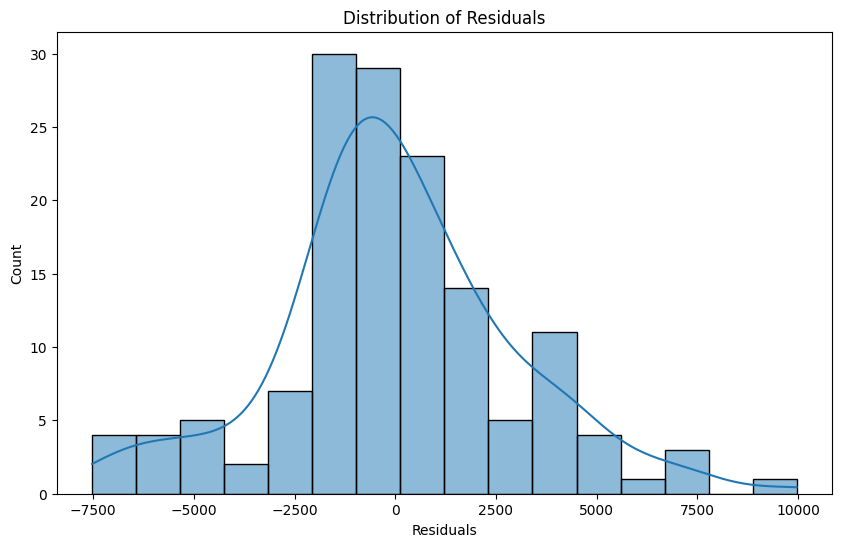

In [84]:
residuals = y_train - y_train_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

In [85]:
import scipy.stats as stats
stat, p_value = stats.shapiro(residuals)
print('Shapiro-Wilk test stat: {:.4f}, p-value: {:.4f}'.format(stat, p_value))
if p_value > 0.05:
    print("Residuals are normally distributed")
else:
    print("Residuals are not normally distributed")

Shapiro-Wilk test stat: 0.9719, p-value: 0.0049
Residuals are not normally distributed


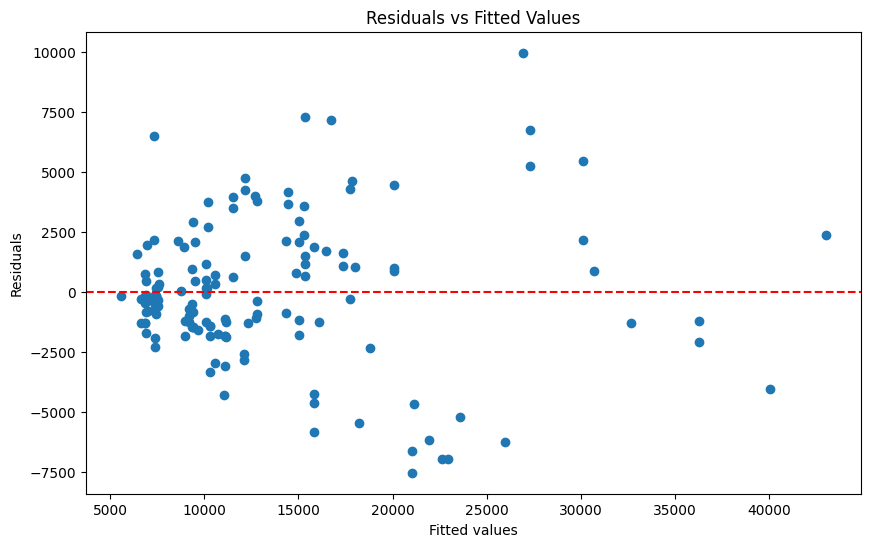

In [86]:
plt.figure(figsize=(10,6))
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

In [87]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
X_train_final_with_const = sm.add_constant(X_train_final)
bp_test = het_breuschpagan(residuals, X_train_final_with_const)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))
if bp_test[1] > 0.05:
    print("Residuals have constant variance (Homoscedasticity)")
else:
    print("Residuals do not have constant variance (Heteroscedasticity)")

{'Lagrange multiplier statistic': 50.092525624110394, 'p-value': 1.326677319083273e-09, 'f-value': 14.773140819085823, 'f p-value': 1.4013370948211575e-11}
Residuals do not have constant variance (Heteroscedasticity)


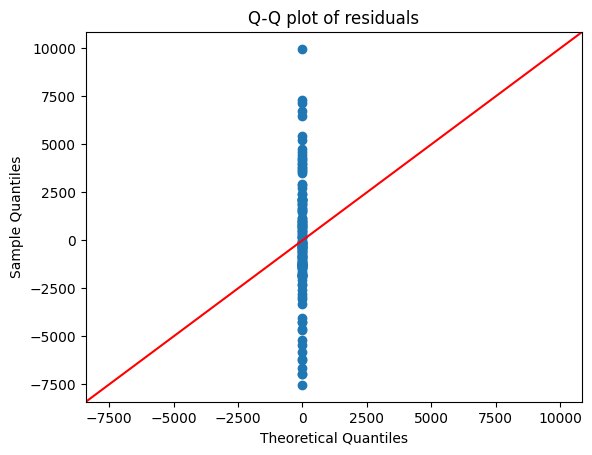

In [88]:
sm.qqplot(residuals, line='45')
plt.title('Q-Q plot of residuals')
plt.show()